#### 1. Importing necessary packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
import pandas_profiling 
import seaborn as sns


from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

C:\Users\lenovo1\Anaconda2\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\lenovo1\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Users\lenovo1\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Users\lenovo1\Anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\lenovo1\Anaconda2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\lenovo1\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.

#### 2. Reading Data

In [2]:
train = pd.read_csv('data/train.csv')
feature = pd.read_csv('data/features.csv')
test = pd.read_csv('data/test.csv')
stores = pd.read_csv('data/stores.csv')


# For Output_excel file...
writer=pd.ExcelWriter('Walmart Store Sales Prediction output.xlsx', engine='xlsxwriter')


In [3]:
train_bt = pd.merge(train,stores) 
train = pd.merge(train_bt,feature)
#
test_bt = pd.merge(test,stores)
test= pd.merge(test_bt,feature)

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [7]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


#### 3. Pandas profiling for train and test

In [141]:
pandas_profiling.ProfileReport(train)

Number of variables,16
Number of observations,421570
Total Missing (%),0.0%
Total size in memory,51.9 MiB
Average record size in memory,129.0 B
Numeric,13
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [142]:
pandas_profiling.ProfileReport(test)

Number of variables,15
Number of observations,115064
Total Missing (%),0.0%
Total size in memory,13.3 MiB
Average record size in memory,121.0 B
Numeric,12
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


#### 4. Classifying variables according to the datatype

In [8]:
train['Dept'] = train['Dept'].astype(object)
test['Dept'] = test['Dept'].astype(object)
train['IsHoliday']=train['IsHoliday'].astype(bool)
test['IsHoliday']=test['IsHoliday'].astype(bool)
train['Store']=train['Store'].astype(object)
test['Store']=test['Store'].astype(object)
train['Type']=train['Type'].astype(object)
test['Type']=test['Type'].astype(object)

#### 5. Missing value treatment

In [9]:
print train.isnull().sum()
print "*"*30
print test.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64
******************************
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [10]:
test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [11]:
train=train.fillna(0)
test=test.fillna(0)

In [12]:
print train.isnull().sum()
print "*"*30
print test.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
******************************
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


#### 5. Identifying Numerical and Categorical Variables

In [13]:
train_num_list=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
train_cat_list=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object','bool']]
print train_num_list
print train_cat_list

['CPI', 'Temperature', 'Unemployment', 'Weekly_Sales', 'MarkDown4', 'Dept', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown5', 'Store', 'Size']
['IsHoliday', 'Date', 'Type']


In [14]:
test_num_list=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
test_cat_list=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object','bool']]
print test_num_list
print test_cat_list

['CPI', 'Temperature', 'Unemployment', 'MarkDown4', 'Dept', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown5', 'Store', 'Size']
['IsHoliday', 'Date', 'Type']


#### 6. Function for addition or removal of variables

In [15]:
def update_num_cat(var):
    elems_in_both_cat_lists = set(train_cat_list) & set(test_cat_list)
    elems_in_both_num_lists = set(train_num_list) & set(test_num_list)
    if var in elems_in_both_cat_lists:
        train_cat_list.remove(var)
        test_cat_list.remove(var)
        print " The {a} variable is dropped from  train cat list and test cat list".format(a=var)
    elif var in elems_in_both_num_lists:
        train_num_list.remove(var)
        test_num_list.remove(var)
        print " The {a} variable is dropped from train num list and test num list".format(a=var)
    else:
        print "This variable is not present in either of the list."

            
# Function to drop all the vaariable in given list from main dataset i.e "credit".
def list_drop(listx):
    for var in listx:
        update_num_cat(var)
        train.drop(var,axis=1,inplace=True)
        test.drop(var,axis=1,inplace=True)

In [16]:
def add_list(lista,c):
    
    if c==1:
        for var in lista:
            train_num_list.append(var)
            test_num_list.append(var)
            print " The {a} variable has been added to the train and test num list".format(a=var)
    elif c==0:
        for var in lista:
            train_cat_list.append(var)
            test_cat_list.append(var)
            print  " The {a} variable has been added to the train and test cat list".format(a=var)
        
    

#### 7. Checking Y variable's distribution

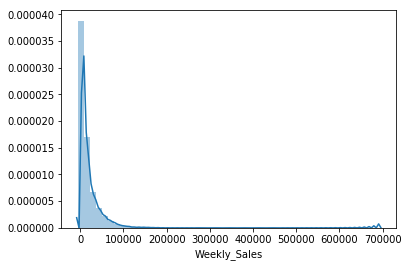

In [17]:
import seaborn as sns
sns.distplot(train.Weekly_Sales)

#### 8. Separating data into numericla and Categorical variables

In [18]:
train_num=train[train_num_list]
test_num=test[test_num_list]

In [19]:
train_cat=train[train_cat_list]
test_cat=test[test_cat_list]

In [20]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary1=train_num.apply(lambda x: var_summary(x)).T
num_summary1

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CPI,421570.0,0.0,7.217360e+07,171.201947,182.31878,39.159276,1.533449e+03,126.064,126.111903,126.496258,128.823806,132.022667,182.31878,212.416993,219.444244,221.941558,225.473509,227.232807
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Unemployment,421570.0,0.0,3.355819e+06,7.960289,7.86600,1.863296,3.471872e+00,3.879,4.156000,5.326000,5.965000,6.891000,7.86600,8.572000,9.816000,12.187000,14.180000,14.313000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
MarkDown4,421570.0,0.0,4.566161e+08,1083.132268,0.00000,3894.529945,1.516736e+07,0.000,0.000000,0.000000,0.000000,0.000000,0.00000,425.290000,2828.890000,5163.630000,16822.460000,67474.850000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,421570.0,0.0,1.091898e+09,2590.074819,0.00000,6052.385934,3.663138e+07,0.000,0.000000,0.000000,0.000000,0.000000,0.00000,2809.050000,8624.560000,12407.710000,28177.290000,88646.760000
MarkDown2,421570.0,0.0,3.709708e+08,879.974298,0.00000,5084.538801,2.585253e+07,-265.760,0.000000,0.000000,0.000000,0.000000,0.00000,2.200000,452.880000,3789.560000,21813.160000,104519.540000
MarkDown3,421570.0,0.0,1.973317e+08,468.087665,0.00000,5528.873453,3.056844e+07,-29.100,0.000000,0.000000,0.000000,0.000000,0.00000,4.540000,74.410000,216.170000,2083.280000,141630.610000


In [21]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])
# finds out total number, missing values,count of each category
cat_summary1=train_cat.apply(lambda x: cat_summary(x))
cat_summary1.T

,N,NMISS,ColumnsNames
IsHoliday,421570,0,False 391909 True 29661 Name: IsHolida...
Date,421570,0,2011-12-23 3027 2011-11-25 3021 2011-12-...
Type,421570,0,A 215478 B 163495 C 42597 Name: Type...


In [22]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [23]:
# Extract date features
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

In [24]:
list_dt=['Date_dayofweek','Date_month','Date_year','Date_day']
add_list(list_dt,0)

 The Date_dayofweek variable has been added to the train and test cat list
 The Date_month variable has been added to the train and test cat list
 The Date_year variable has been added to the train and test cat list
 The Date_day variable has been added to the train and test cat list


In [25]:
print train.Type.value_counts()
print "*"*30
print test.Type.value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64
******************************
A    58713
B    44500
C    11851
Name: Type, dtype: int64


In [26]:
print train.IsHoliday.value_counts()
print "*"*30
print test.IsHoliday.value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64
******************************
False    106136
True       8928
Name: IsHoliday, dtype: int64


In [27]:
type_mapping = {"A": 1, "B": 2, "C": 3}

train['Type'] = train['Type'].map(type_mapping)
test['Type'] = test['Type'].map(type_mapping)

In [28]:
type_mapping2 = {False: 0, True: 1}

train['IsHoliday'] = train['IsHoliday'].map(type_mapping2)
test['IsHoliday']=test['IsHoliday'].map(type_mapping2)

In [29]:
train['Super_Bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']==datetime(2011, 2, 11)) | (train['Date']==datetime(2012, 2, 10)) | (train['Date']==datetime(2013, 2, 8)),1,0)
train['Labour_Day'] = np.where((train['Date']==datetime(2010, 9, 10)) | (train['Date']==datetime(2011, 9, 9)) | (train['Date']==datetime(2012, 9, 7)) | (train['Date']==datetime(2013, 9, 6)),1,0)
train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)
#........................................................................
test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, 29)),1,0)
test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)

In [30]:
list_holiday=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
add_list(list_holiday,0)

 The Super_Bowl variable has been added to the train and test cat list
 The Labour_Day variable has been added to the train and test cat list
 The Thanksgiving variable has been added to the train and test cat list
 The Christmas variable has been added to the train and test cat list


In [31]:
# Altering the isHoliday value depending on these new holidays...
train['IsHoliday']=train['IsHoliday']|train['Super_Bowl']|train['Labour_Day']|train['Thanksgiving']|train['Christmas']
test['IsHoliday']=test['IsHoliday']|test['Super_Bowl']|test['Labour_Day']|test['Thanksgiving']|test['Christmas']

In [32]:
print train.Christmas.value_counts()
print train.Super_Bowl.value_counts()
print train.Thanksgiving.value_counts()
print train.Labour_Day.value_counts()

0    415624
1      5946
Name: Christmas, dtype: int64
0    412675
1      8895
Name: Super_Bowl, dtype: int64
0    415611
1      5959
Name: Thanksgiving, dtype: int64
0    412709
1      8861
Name: Labour_Day, dtype: int64


In [33]:
print test.Christmas.value_counts()
print test.Super_Bowl.value_counts()
print test.Thanksgiving.value_counts()
print test.Labour_Day.value_counts()

0    112076
1      2988
Name: Christmas, dtype: int64
0    112100
1      2964
Name: Super_Bowl, dtype: int64
0    112088
1      2976
Name: Thanksgiving, dtype: int64
0    115064
Name: Labour_Day, dtype: int64


In [34]:
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
list_drop(dp)

 The Super_Bowl variable is dropped from  train cat list and test cat list
 The Labour_Day variable is dropped from  train cat list and test cat list
 The Thanksgiving variable is dropped from  train cat list and test cat list
 The Christmas variable is dropped from  train cat list and test cat list


In [35]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
2,1,3,2010-02-05,13740.12,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
3,1,4,2010-02-05,39954.04,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
4,1,5,2010-02-05,32229.38,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5


In [36]:
dp=['Date']
list_drop(dp)

 The Date variable is dropped from  train cat list and test cat list


In [172]:
pandas_profiling.ProfileReport(train)

Number of variables,19
Number of observations,421570
Total Missing (%),0.0%
Total size in memory,64.3 MiB
Average record size in memory,160.0 B
Numeric,17
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [37]:
dp=['Date_dayofweek']
list_drop(dp)

 The Date_dayofweek variable is dropped from  train cat list and test cat list


In [38]:
train.columns= [phrase.strip().replace('.0', '') for phrase in train.columns]
train.columns

Index([u'Store', u'Dept', u'Weekly_Sales', u'IsHoliday', u'Type', u'Size',
       u'Temperature', u'Fuel_Price', u'MarkDown1', u'MarkDown2', u'MarkDown3',
       u'MarkDown4', u'MarkDown5', u'CPI', u'Unemployment', u'Date_month',
       u'Date_year', u'Date_day'],
      dtype='object')

In [39]:
test.columns= [phrase.strip().replace('.0', '') for phrase in test.columns]
test.columns

Index([u'Store', u'Dept', u'IsHoliday', u'Type', u'Size', u'Temperature',
       u'Fuel_Price', u'MarkDown1', u'MarkDown2', u'MarkDown3', u'MarkDown4',
       u'MarkDown5', u'CPI', u'Unemployment', u'Date_month', u'Date_year',
       u'Date_day'],
      dtype='object')

In [40]:
train_X=train.drop(['Weekly_Sales'], axis=1)

#### train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 17), (421570L,), (115064, 17))

In [41]:
my_f = "+".join(train.columns.difference( ['Weekly_Sales'] ))

#my_formula = "ln_cardspent~" + all_columns

print my_f

CPI+Date_day+Date_month+Date_year+Dept+Fuel_Price+IsHoliday+MarkDown1+MarkDown2+MarkDown3+MarkDown4+MarkDown5+Size+Store+Temperature+Type+Unemployment


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [43]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('Weekly_Sales~'+my_f, train, return_type='dataframe')

In [44]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [45]:
VIF=vif.round(1)
VIF

,VIF Factor,features
0,30298662.0,Intercept
1,1.4,CPI
2,1.0,Date_day
3,1.3,Date_month
4,4.8,Date_year
5,1.0,Dept
6,3.5,Fuel_Price
7,1.2,IsHoliday
8,4.5,MarkDown1
9,1.1,MarkDown2


In [46]:
import statsmodels.formula.api as smf
lm1=smf.ols(formula='Weekly_Sales~'+my_f, data=train).fit()

In [47]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     2382.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:04:48   Log-Likelihood:            -4.8075e+06
No. Observations:              421570   AIC:                         9.615e+06
Df Residuals:                  421552   BIC:                         9.615e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.388e+06   1.84e+05      7.547      0.000    1.03e+06    1.75e+06
CPI            -19.4160      0.992    -19.578      0.000     -21.360     -17.472
Date_day       -17.9245      3.896     -4.600      0.000     -25.561     -10.288
Date_month     114.9642     11.596      9.914      0.000      92.236     137.692
Date_year     -690.9962     91.626     -7.542      0.000    -870.580    -511.413
Dept           111.4812      1.096    101.705      0.000     109.333     113.630
Fuel_Price     288.1927    136.395      2.113      0.035      20.863     555.523
IsHoliday      479.6271    141.907      3.380      0.001     201.494     757.760
MarkDown1        0.0126      0.012      1.075      0.282      -0.010       0.035
MarkDown2        0.0078      0.007      1.109      0.267      -0.006       0.022
MarkDown3        0.1080      0.006     16.999      0.000       0.096       0.120
MarkDown4        0.0222      0.016      1.373      0.170      -0.010       0.054
MarkDown5        0.0986      0.009     10.513      0.000       0.080       0.117
Size             0.1021      0.001    106.317      0.000       0.100       0.104
Store          -93.3750      2.781    -33.570      0.000     -98.827     -87.923
Temperature     19.9449      2.043      9.760      0.000      15.940      23.950
Type          1885.0222     87.754     21.481      0.000    1713.028    2057.017
Unemployment  -234.5848     20.495    -11.446      0.000    -274.754    -194.415
==============================================================================
Omnibus:                   296091.936   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8746218.448
Skew:                           3.018   Prob(JB):                         0.00
Kurtosis:                      24.482   Cond. No.                     8.24e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
while True:
    
    
    pvalues=pd.DataFrame(lm1.pvalues,columns=['Pvalue'])
    pvalues.reset_index(inplace=True)
    pvalues.rename(columns={'index':'variable'},inplace=True)
    row=pvalues.Pvalue.idxmax()
    lmax=pvalues.iloc[row,1]
    vmax=pvalues.iloc[row,0]
    #max1=pvalues.loc[[row]]
    if((lmax)*100.00<5.00):
        break
    else :   
        train.drop(columns=[vmax],axis=1,inplace=True)
        print "{a} has been removed as its pvalue was {b}".format(a=vmax,b=lmax)
            
        #train ,test = train_test_split(data_new,test_size=0.3,random_state = 123 )
            
        my_f = "+".join(train.columns.difference( ['Weekly_Sales'] ))
            
        lm1=smf.ols(formula='Weekly_Sales~'+my_f, data=train).fit()

            #my_formula = "ln_cardspent~" + all_columns

MarkDown1 has been removed as its pvalue was 0.282415692594
MarkDown2 has been removed as its pvalue was 0.225865527063
Fuel_Price has been removed as its pvalue was 0.0524692648184


In [128]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     2892.
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:06:16   Log-Likelihood:            -4.8075e+06
No. Observations:              421570   AIC:                         9.615e+06
Df Residuals:                  421555   BIC:                         9.615e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.029e+06   1.02e+05     10.059      0.000    8.29e+05    1.23e+06
CPI            -20.1158      0.934    -21.533      0.000     -21.947     -18.285
Date_day       -17.7176      3.887     -4.559      0.000     -25.335     -10.100
Date_month     120.9630     11.323     10.683      0.000      98.770     143.156
Date_year     -512.0047     50.854    -10.068      0.000    -611.677    -412.333
Dept           111.4729      1.096    101.698      0.000     109.325     113.621
IsHoliday      493.3390    138.898      3.552      0.000     221.104     765.574
MarkDown3        0.1075      0.006     16.993      0.000       0.095       0.120
MarkDown4        0.0340      0.010      3.572      0.000       0.015       0.053
MarkDown5        0.0974      0.009     10.679      0.000       0.080       0.115
Size             0.1024      0.001    107.386      0.000       0.100       0.104
Store          -93.5905      2.777    -33.706      0.000     -99.033     -88.148
Temperature     20.0874      2.004     10.025      0.000      16.160      24.015
Type          1892.7735     87.696     21.583      0.000    1720.893    2064.654
Unemployment  -226.3980     20.211    -11.202      0.000    -266.011    -186.785
==============================================================================
Omnibus:                   296082.416   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8745208.435
Skew:                           3.018   Prob(JB):                         0.00
Kurtosis:                      24.481   Cond. No.                     4.58e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
train_X=train.drop(['Weekly_Sales'], axis=1)

#### train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 17), (421570L,), (115064, 17))

In [49]:
train_X.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_month,Date_year,Date_day
0,1,1,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
1,1,2,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
2,1,3,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
3,1,4,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5
4,1,5,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5


In [50]:
test_X.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_month,Date_year,Date_day
0,1,1,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,11,2012,2
1,1,2,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,11,2012,2
2,1,3,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,11,2012,2
3,1,4,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,11,2012,2
4,1,5,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,11,2012,2


In [51]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [52]:
param_grid = {'n_estimators': np.arange(5,14),'min_samples_split':np.arange(50,80)}

In [ ]:
tree = GridSearchCV(RandomForestRegressor( warm_start=True), param_grid, cv = 10)
tree.fit( train_X, train_y )

In [54]:
clf = RandomForestRegressor(n_estimators=9,min_samples_split=100)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 95 % 



In [187]:
param_grid = {'max_depth': np.arange(5,14),'min_samples_split':np.arange(50,200)}

In [55]:
clf=DecisionTreeRegressor(max_depth=10)
clf.fit(train_X, train_y)
y_pred_dt= clf.predict(test_X)
acc_dt = round( clf.score(train_X, train_y) * 100, 2)
print (str(acc_dt) + ' percent')

87.66 percent


In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
max_depth_range=range(6,14)

RMSE_scores=[]

for depth in max_depth_range:
    treereg=DecisionTreeRegressor(max_depth=depth,min_samples_split=100,random_state=123)
    MSE_scores=cross_val_score(treereg,train_X,train_y,cv=10,scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [58]:
print('scores:',RMSE_scores)

('scores:', [13950.425503237031, 13137.069383769069, 12962.565648246602, 12665.189871335147, 12353.09641482102, 12163.188332801446, 11980.401360685675, 12231.332450488066])


Text(0,0.5,'RMSE score')

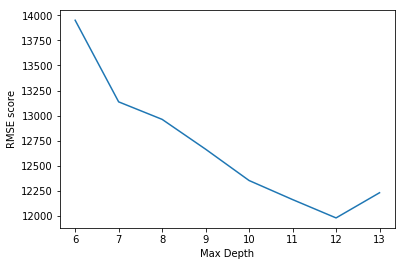

In [59]:
plt.plot(max_depth_range,RMSE_scores)
plt.xlabel('Max Depth')
plt.ylabel('RMSE score')

In [60]:
clf_dt=DecisionTreeRegressor(max_depth=12,min_samples_split=100,random_state=123)
clf_dt.fit(train_X, train_y)
y_pred_dt= clf_dt.predict(test_X)
acc_dt = round( clf_dt.score(train_X, train_y) * 100, 2)
print (str(acc_dt) + ' percent')

92.29 percent
